In [ ]:
import numpy as np
import torch
from PIL import Image
from lavis.common.gradcam import getAttMap
from lavis.models import load_model_and_preprocess
from lavis.models.blip_models.blip_image_text_matching import compute_gradcam
from matplotlib import pyplot as plt
from pyprojroot import here

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else "cpu"

model, vis_processors, text_processors = load_model_and_preprocess(
    "blip_image_text_matching",
    "large",
    device=device,
    is_eval=True,
)

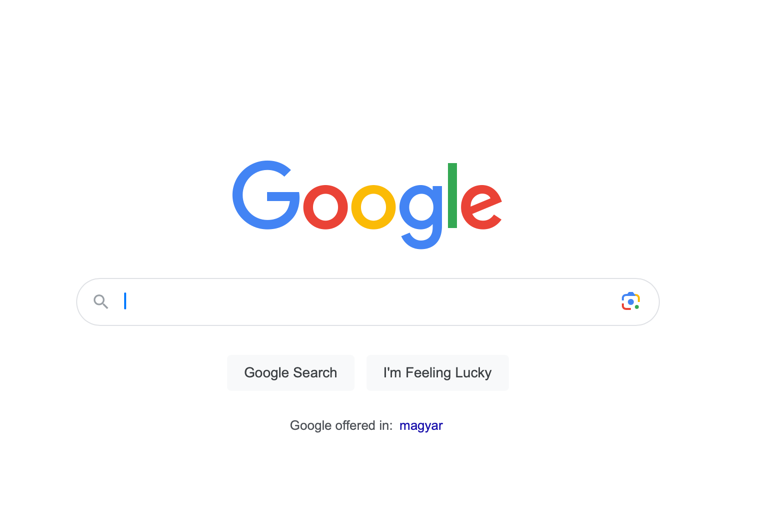

In [87]:
raw_image = Image.open(here("data/test-images/img_3.png")).convert("RGB")
display(raw_image)

In [88]:
caption = "search button"

In [89]:
%%time

dst_w = 720
w, h = raw_image.size
scaling_factor = dst_w / w

resized_img = raw_image.resize((int(w * scaling_factor), int(h * scaling_factor)))
norm_img = np.float32(resized_img) / 255
img = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
txt = text_processors["eval"](caption)
txt_tokens = model.tokenizer(txt, return_tensors="pt").to(device)
gradcam, _ = compute_gradcam(model, img, txt, txt_tokens, block_num=7)
avg_gradcam = getAttMap(norm_img, gradcam[0][1].cpu().numpy(), blur=True)
# fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# ax.imshow(avg_gradcam)
# fig.show()

avg_gradcam_2 = getAttMap(
    norm_img, gradcam[0][1].cpu().numpy(), blur=True, overlap=False,
)

CPU times: user 26.6 s, sys: 2.81 s, total: 29.4 s
Wall time: 29.7 s


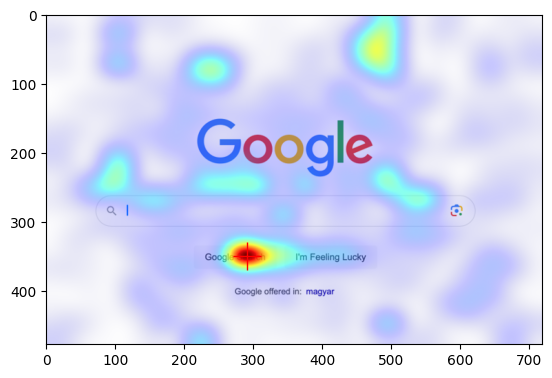

In [90]:
coordinates = np.unravel_index(avg_gradcam_2.argmax(), avg_gradcam_2.shape)
coordinates

plt.imshow(avg_gradcam)
plt.plot(coordinates[1], coordinates[0], marker="+", markersize=20, c='red')
plt.show()